# Modelo de Práctico Análisis y Visualización de Datos 

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches


# Carga de Datos

In [3]:
url = 'https://raw.githubusercontent.com/francozacco/mentorias_diplodatos_2019/master/TP01/galaxias.csv'
data = pd.read_csv(url, sep=',')

In [4]:
display('Head',data.head(4))
display('Tamaño',data.shape)
display('Valores faltantes',data.notnull().all().to_frame())
display('Estadísticos del dataset',data.describe())

'Head'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


'Tamaño'

(92102, 13)

'Valores faltantes'

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


'Estadísticos del dataset'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117608,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209297,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [6]:
clase=[]
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(10)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0,S
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1,I
4,129.945145,55.628530,18.08747,16.73876,16.16752,15.83606,15.55770,8.978182,0.035336,-1.919950,0,1,0,S
5,131.328756,55.842499,18.93437,17.23941,16.45432,16.02061,15.70122,5.162340,0.044426,-2.480055,0,1,0,S
6,132.234271,55.135706,18.60261,16.86640,16.08706,15.70185,15.38955,7.045557,0.030671,-2.515554,0,1,0,S
7,130.242257,52.871736,18.44686,16.78795,16.00473,15.60493,15.23374,6.949870,0.043900,-2.442131,0,0,1,I
8,133.017396,52.566768,18.97409,17.82834,17.37524,17.13555,16.88875,5.847063,0.047060,-1.598846,0,0,1,I
9,133.395285,52.532760,18.93884,17.45655,16.67665,16.27514,15.93159,7.389670,0.030417,-2.262188,0,1,0,S


# Visualización

Encuentre una forma adecuada para exhibir el balance de las clase eliptica (E), espiral (S) e irregular (I) usando la nueva columna clase.

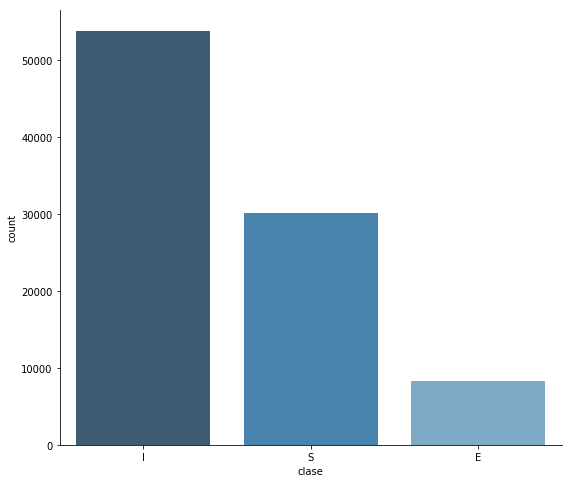

In [7]:
data_count = pd.DataFrame(data['clase'].value_counts())
data_count.columns = ['count']
data_count.index.name = 'clase'
data_count.reset_index(inplace=True)
plt.figure(figsize=(9,8))
seaborn.barplot(x='clase',
                y='count',
                data=data_count,
                palette='Blues_d')
seaborn.despine()

Use histogramas y boxplots para visualizar intervalos de confianza, mediana, media, intercuartiles y *outliers* de la posición **z** y del tamaño **R** para algun tipo morfologíco.

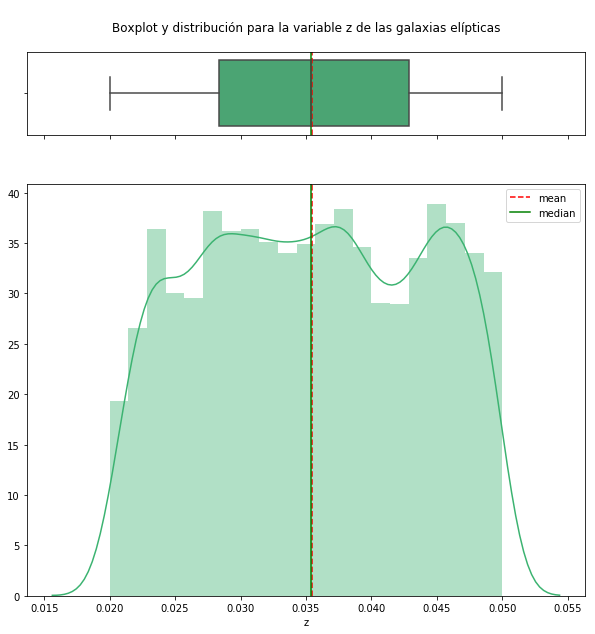

In [0]:
ze_only = data[data['clase'] == 'E'][['z']]

f, (ax_box, ax_hist) = plt.subplots(2, 
                                    figsize=(10,10),
                                    sharex=True,
                                    gridspec_kw= {"height_ratios": (0.2, 1)})
z_mean = ze_only['z'].mean()
z_median = ze_only['z'].median()

seaborn.boxplot(ze_only['z'],
                ax=ax_box,
                color='mediumseagreen').set_title(
                '\nBoxplot y distribución para la variable z de las galaxias elípticas\n')
ax_box.axvline(z_mean, color='r', linestyle='--')

ax_box.axvline(z_median, color='g', linestyle='-')

seaborn.distplot(ze_only['z'],
                 ax=ax_hist,
                 color='mediumseagreen')
ax_hist.axvline(z_mean, color='r', linestyle='--')
ax_hist.axvline(z_median, color='g', linestyle='-')

plt.legend({'mean':z_mean,'median':z_median})

ax_box.set(xlabel='')
plt.show()

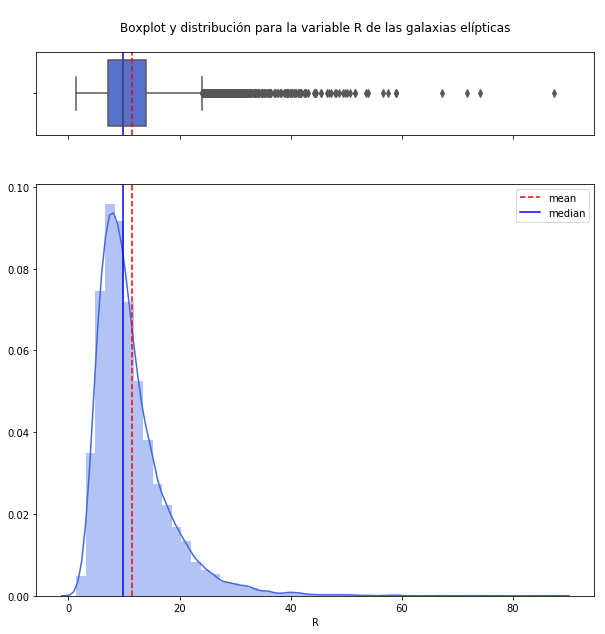

In [0]:
Re_only = data[data['clase'] == 'E'][['R']]

f, (ax_box, ax_hist) = plt.subplots(2,
                                    figsize=(10,10),
                                    sharex=True,
                                    gridspec_kw= {"height_ratios": (0.2, 1)})
R_mean = Re_only['R'].mean()
R_median = Re_only['R'].median()

seaborn.boxplot(Re_only['R'],
                ax=ax_box,
                color='royalblue').set_title(
                '\nBoxplot y distribución para la variable R de las galaxias elípticas\n')
ax_box.axvline(R_mean, color='r', linestyle='--')
ax_box.axvline(R_median, color='b', linestyle='-')

seaborn.distplot(Re_only['R'],
                 ax=ax_hist,
                 color='royalblue')
ax_hist.axvline(R_mean, color='r', linestyle='--')
ax_hist.axvline(R_median, color='b', linestyle='-')

plt.legend({'mean':R_mean,'median':R_median})

ax_box.set(xlabel='')
plt.show()


Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

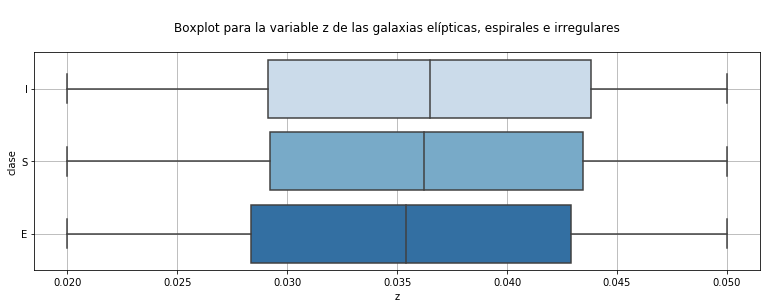

In [0]:
z_only = data[['clase','z']]

fig, ax1 = plt.subplots(figsize=(13,4))

seaborn.boxplot(x='z',
                y='clase',
                data=z_only,
                ax=ax1,
                palette='Blues').set_title(
                '\nBoxplot para la variable z de las galaxias elípticas, espirales e irregulares\n')
ax1.grid()
ax1.set_axisbelow(True)
plt.show()


# Valores característicos 

Mostrar los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

In [0]:
ze_only = data[data['clase'] == 'E'][['z']]
zs_only = data[data['clase'] == 'S'][['z']]
zi_only = data[data['clase'] == 'I'][['z']]

z_stats = ze_only.describe()
z_stats.columns = ['Elipticas']

zs_stats = zs_only.describe()['z']

zi_stats = zi_only.describe()['z']

z_stats['Espirales'] = zs_stats 
z_stats['Irregulares'] = zi_stats

index = ['median']
z_medians = pd.DataFrame({'Elipticas': [ze_only.median()['z']],
                         'Espirales': [zs_only.median()['z']],
                         'Irregulares': [zi_only.median()['z']]},
                          index=index)

z_stats.append(z_medians)

,Elipticas,Espirales,Irregulares
count,8257.000000,30046.000000,53799.000000
mean,0.035441,0.036080,0.036198
std,0.008377,0.008375,0.008473
min,0.020001,0.020001,0.020002
25%,0.028338,0.029204,0.029136
50%,0.035387,0.036243,0.036516
75%,0.042901,0.043443,0.043803
max,0.049999,0.049999,0.050000
median,0.035387,0.036243,0.036516
